In [16]:
import pandas as pd
import numpy as np
    
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


data=pd.read_csv('/home/jimbrootan/Desktop/ML_data/smsspamcollection/SMSSpamCollection',delimiter='\t', header=None)
data

X_train_raw,X_test_raw,y_train,y_test=train_test_split(data.iloc[:,1],data.iloc[:,0])

vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)

model=LogisticRegression()

model.fit(X_train,y_train)


LogisticRegression()

[[0.93632177 0.06367823]
 [0.94661942 0.05338058]
 [0.91793706 0.08206294]
 ...
 [0.96997481 0.03002519]
 [0.98155219 0.01844781]
 [0.94692094 0.05307906]]


/home/jimbrootan/anaconda3/envs/pythonds/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass pos_label=spam as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


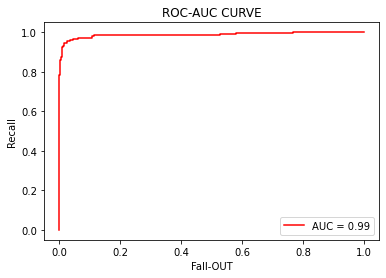

In [47]:
"""ROC AND AUC PLOTTING"""

from sklearn.metrics import roc_curve,auc

import matplotlib.pyplot as plt

pred=model.predict_proba(X_test)
print(pred)

fpr,tpr,thresolds=roc_curve(y_test,pred[:,1],'spam')
roc_auc=auc(fpr,tpr)

plt.title("ROC-AUC CURVE")
plt.plot(fpr,tpr,'r',label='AUC = %0.2f'% roc_auc)
plt.xlabel("Fall-OUT")
plt.ylabel('Recall')
plt.legend(loc="lower right")
plt.show()